##### Dataset: healthcare_stroke.csv
##### Problem Statement
###### It is agreed that stroke is the second leading cause of death in the world. It is important that the health practitioners can predict if a patient is prone to stoke earlier to reduce the causalities of stroke in the world.

### Task
##### Build a deep learning model that can predict stroke sickness from patients.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder 
import livelossplot

import plotly.express as px

import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

plot_losses = livelossplot.PlotLossesKeras()


#### Load dataset

In [2]:
data = pd.read_csv("C://Users//CK773QB//OneDrive - EY//Desktop//The Learner//Chinhoyi//1.2//Machine Learning//Datasets//healthcare_stroke.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### EDA

#### Shape of the dataset

In [3]:
data.shape

(5110, 12)

#### Explore the stats of the numerical columns

In [4]:
### Exploring the statistics of the numeric columns.
data.describe()[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### The age statistics show the minimal age value to be 0.08, we therefore need to verify if its not an outlier

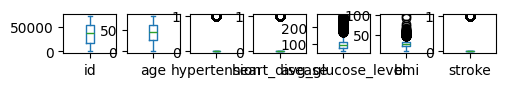

In [12]:
data.plot(kind='box',subplots=True, layout = (8) ,sharex=False, sharey=False)
plt.show()

In [5]:
fig = px.box(data, y='age')
fig.show()

#### With reference to the plot, it shows the minimum age value of 0.08 is insignificant and will not skew age value.

#### Verifying data skewness with regards to Gluecose level

In [7]:
fig = px.box(data, y='')
fig.show()

In [ ]:
fig = px.histogram(df, x=’fare_’)
fig.show()

In [12]:
#detailed exploration of columns: show non null values, column data type etc
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
#Showing extact number of missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### The BMI feature contains 201 null values

In [8]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [13]:
#### Since BMI feature has outliers, the best approach is to utilise the median

bmi_median = data['bmi'].median()
bmi_median


28.1

In [15]:
data['bmi'].fillna(bmi_median,inplace=True)

C:\Users\CK773QB\AppData\Local\Temp\ipykernel_32548\3103717188.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [16]:
### Confirming if missing values have been handled through imputation technique
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Handling categorical data through encoding

In [17]:
label_encoder_gender = LabelEncoder()
data['gender'] = label_encoder_gender.fit_transform(data['gender']) # encoding with respect to categorical variables
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
label_encoder_married = LabelEncoder()
data['ever_married'] = label_encoder_married.fit_transform(data['ever_married'])
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,Urban,83.75,28.1,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [58]:
data[data['Residence_type']=='Rural'].count()

id                   2514
gender               2514
age                  2514
hypertension         2514
heart_disease        2514
ever_married         2514
work_type            2514
Residence_type       2514
avg_glucose_level    2514
bmi                  2514
smoking_status       2514
stroke               2514
dtype: int64

In [59]:
### Checking unknowns in smoking status feature

data['smoking_status'].value_counts()['Unknown']

1544

In [21]:
#### Using one hot encoding on smoking_status feature.
encoder_smoking = OneHotEncoder()
smoking_encoder = encoder_smoking.fit_transform(data[['smoking_status']])
smoking_encoder

<5110x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5110 stored elements in Compressed Sparse Row format>

In [22]:
smoking_encoder.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [23]:
####  Using feature split on smoking status feature.

smoking_df = pd.DataFrame(smoking_encoder.toarray(),columns=encoder_smoking.get_feature_names_out(['smoking_status']))
smoking_df

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
5105,0.0,0.0,1.0,0.0
5106,0.0,0.0,1.0,0.0
5107,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,0.0


In [24]:
#### Concatinating four smoking_status features to the main dataframe

combinedData = pd.concat([data.drop('smoking_status',axis=1),smoking_df],axis=1)
combinedData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,1,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,1,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,1,0.0,0.0,1.0,0.0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,0.0,0.0,0.0,1.0
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,Urban,83.75,28.1,0,0.0,0.0,1.0,0.0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,0,0.0,0.0,1.0,0.0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,0,0.0,0.0,1.0,0.0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,0,0.0,1.0,0.0,0.0


In [28]:
#### Dropping smoking unknown smoking status and id

Data2 = combinedData.drop(['smoking_status_Unknown','id'],axis=1)
Data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,1,1.0,0.0,0.0
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,1,0.0,1.0,0.0
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,1,0.0,1.0,0.0
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,0.0,0.0,1.0
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,1,0.0,1.0,0.0


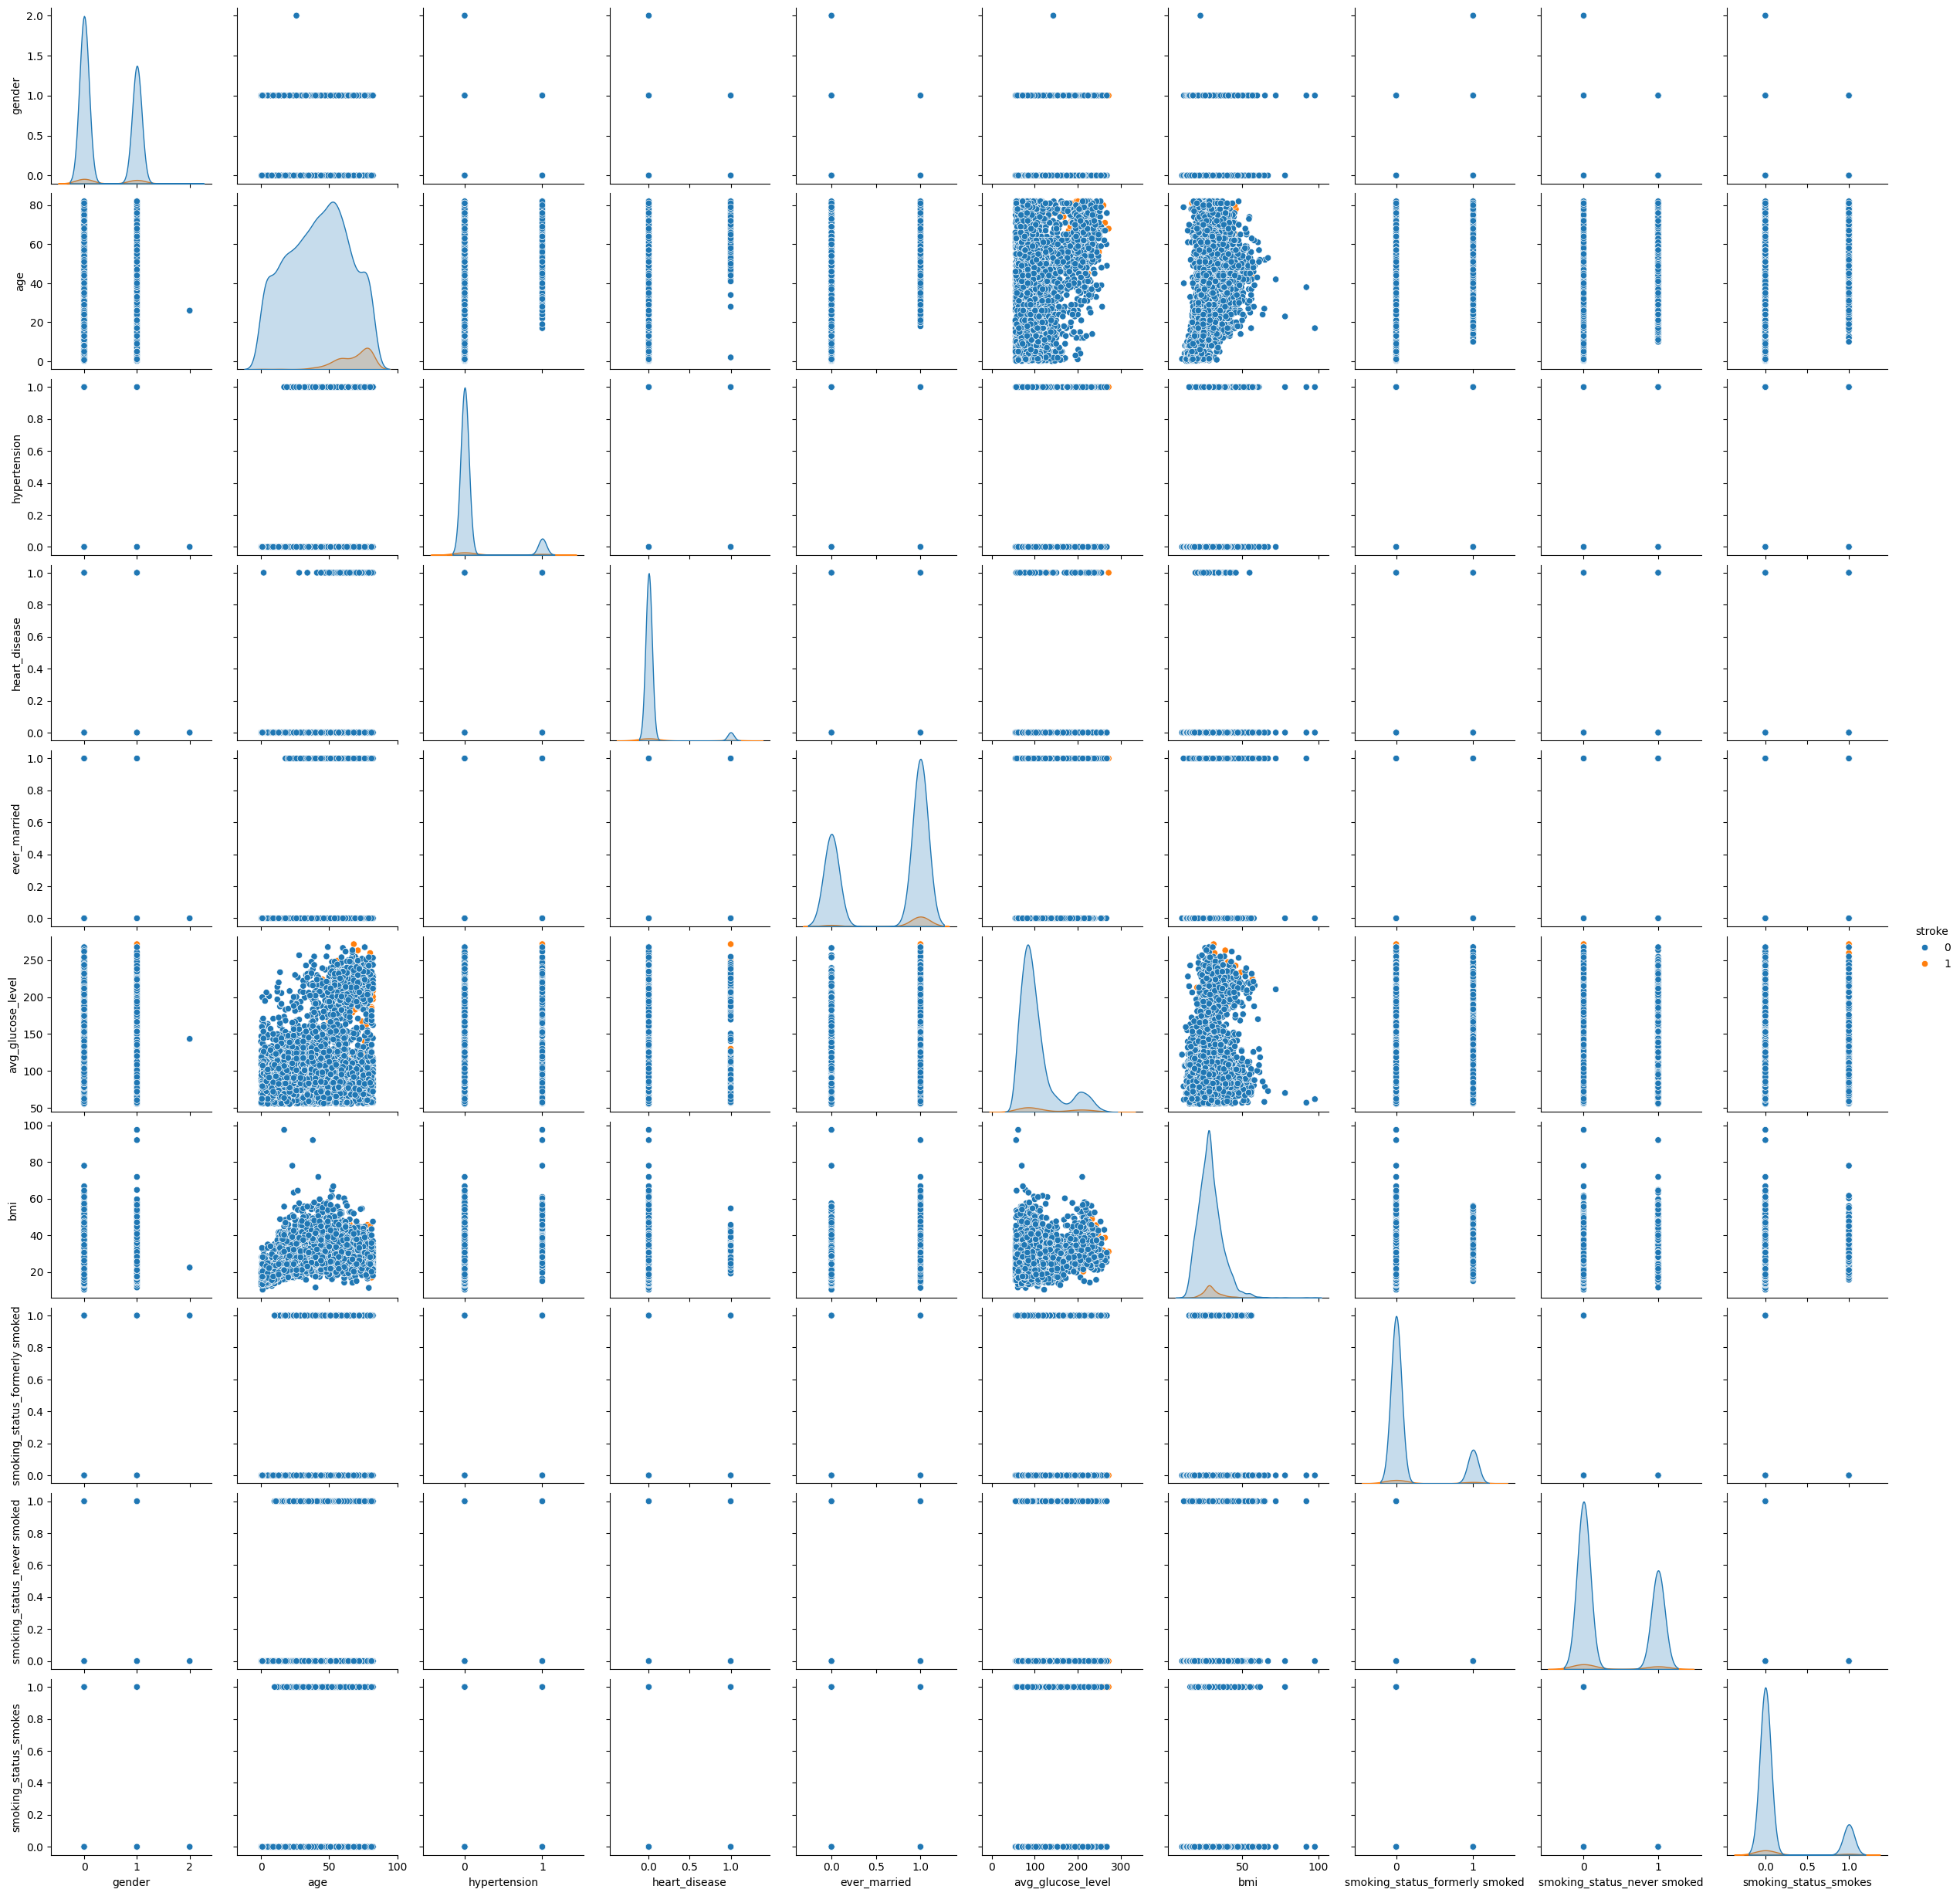

In [32]:
#Visualize the whole dataset on numerical datatype columns
sns.pairplot(Data2, hue='stroke')

In [33]:
#Compute pairwise correlation of columns, excluding NA/null values.
Data2.corr(method="spearman", numeric_only=True)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.019730,0.021084,0.085555,-0.030702,0.049297,0.001850,0.008987,0.043951,-0.099211,0.011233
age,-0.019730,1.000000,0.280647,0.269627,0.664408,0.145168,0.362859,0.249531,0.236744,0.104208,0.062572
hypertension,0.021084,0.280647,1.000000,0.108306,0.164243,0.114041,0.159703,0.127904,0.058853,0.065063,0.031240
heart_disease,0.085555,0.269627,0.108306,1.000000,0.114644,0.106360,0.062685,0.134914,0.066804,-0.021856,0.044049
ever_married,-0.030702,0.664408,0.164243,0.114644,1.000000,0.098379,0.376640,0.108340,0.171256,0.102845,0.105226
avg_glucose_level,0.049297,0.145168,0.114041,0.106360,0.098379,1.000000,0.111914,0.082541,0.034725,0.012447,0.014688
bmi,0.001850,0.362859,0.159703,0.062685,0.376640,0.111914,1.000000,0.050870,0.123105,0.108837,0.094031
stroke,0.008987,0.249531,0.127904,0.134914,0.108340,0.082541,0.050870,1.000000,0.064556,-0.004129,0.008939
smoking_status_formerly smoked,0.043951,0.236744,0.058853,0.066804,0.171256,0.034725,0.123105,0.064556,1.000000,-0.350934,-0.195571
smoking_status_never smoked,-0.099211,0.104208,0.065063,-0.021856,0.102845,0.012447,0.108837,-0.004129,-0.350934,1.000000,-0.327653


##### The spearman correlation coefficient has revealed that the majority of the variables have no correlation with the target variable (stoke) with correlation coefficients around zero. However, age of respondents; hypertension and heart disease conditions; and marriage status showed a relatively weak positive correlation with the stroke. As individuals get older there is a likelihood of having stroke, though the relationship is weak at 0.25 reflecting there are other variables that contribute to stroke. Heart disease, hypertension and marriage have also shown positive weak relationships with coefficients of 0.13; 0.13; and 0.11, respectively. 
There is a strong positive correlation (coefficient =1) between hypertension and heart disease. This reflects that both variables could have the same effect on the target variable.
Despite having weak relationships these variables could be significant in explaining existing patterns in the data

<Axes: xlabel='stroke', ylabel='count'>

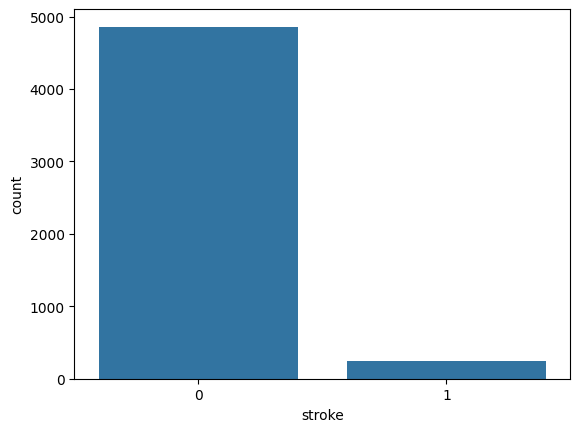

In [34]:
# Show the counts of observations in each categorical bin using bars.
sns.countplot(x='stroke', data=Data2)

In [35]:
### checking count of stroked patients

Data2['stroke'].value_counts()[1]

249

#### It shows that there were more people (about 95% of the population)who did not have stroke than those who have. 0 stands for non stroke and 1 for those who have stroke.

<Axes: xlabel='stroke', ylabel='count'>

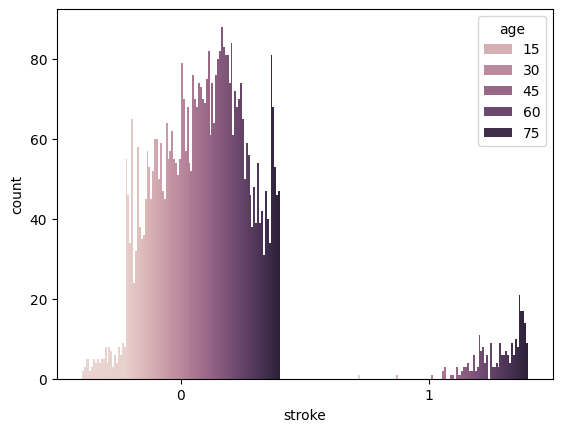

In [36]:
#Show the counts of observations in each categorical bin using bars
sns.countplot(Data2, x='stroke', hue="age")

<Axes: xlabel='stroke', ylabel='count'>

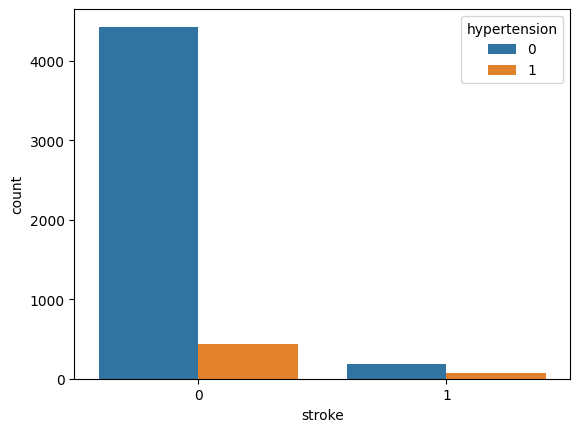

In [37]:
#Show the counts of observations in each categorical bin using bars
sns.countplot(Data2, x='stroke', hue="hypertension")

In [39]:
Data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,1,1.0,0.0,0.0
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,1,0.0,1.0,0.0
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,1,0.0,1.0,0.0
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,1,0.0,0.0,1.0
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,1,0.0,1.0,0.0


In [38]:

X_data = Data2.drop(['work_type', 'Residence_type', 'stroke'], axis =1)
X_data

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1.0,0.0,0.0
1,0,61.0,0,0,1,202.21,28.1,0.0,1.0,0.0
2,1,80.0,0,1,1,105.92,32.5,0.0,1.0,0.0
3,0,49.0,0,0,1,171.23,34.4,0.0,0.0,1.0
4,0,79.0,1,0,1,174.12,24.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.1,0.0,1.0,0.0
5106,0,81.0,0,0,1,125.20,40.0,0.0,1.0,0.0
5107,0,35.0,0,0,1,82.99,30.6,0.0,1.0,0.0
5108,1,51.0,0,0,1,166.29,25.6,1.0,0.0,0.0


In [40]:
#create target data
Y_data = Data2["stroke"]
Y_data

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

#create target data
Y_data = data1['stroke']
Y_data

### Transforming Data

In [42]:
sc = StandardScaler()
X_data = sc.fit_transform(X_data)
#y_data = sc.transform(y_data)

In [43]:
#scaled data
X_data

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [-0.840344  ,  0.78607007, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.45767615,
        -0.7667743 , -0.42731326]])

#### Data Splitting

In [44]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_data,Y_data, test_size = 0.2, random_state = 42)

In [45]:
X_train.shape

(4088, 10)

In [46]:
Y_train.shape

(4088,)

#### Model building

In [61]:
model = Sequential()
model.add(Dense(7, input_shape=(X_train.shape[1],), activation="relu")) #HL1
model.add(Dense(10, activation="relu"))
model.add(Dropout(rate = 0.1))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

print (model.summary())

c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254 (1016.00 B)

 Trainable params: 254 (1016.00 B)

 Non-trainable params: 0 (0.00 B)

None


#### Compling the model

#### Loss Function – one must specify the loss function to evaluate the set of weights on which model will be mapped. we will use cross-entropy as a loss function which is actually known as binary cross-entropy used for binary classification.

- 
#### Optimizer – second is the optimizer to optimize the loss. we will use adam which is a popular version of gradient descent and gives the best result in most problems.

In [62]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

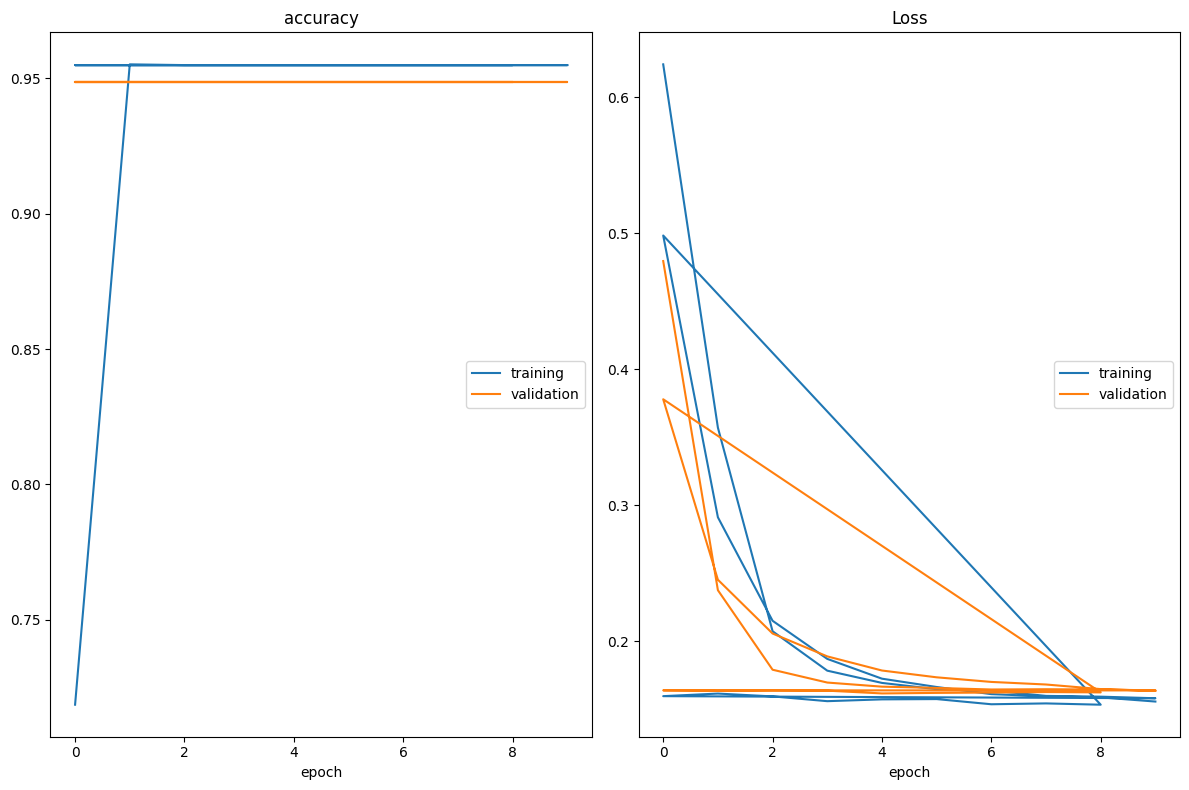

accuracy
	training         	 (min:    0.719, max:    0.955, cur:    0.955)
	validation       	 (min:    0.949, max:    0.949, cur:    0.949)
Loss
	training         	 (min:    0.153, max:    0.624, cur:    0.156)
	validation       	 (min:    0.162, max:    0.479, cur:    0.164)
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9599 - loss: 0.1451 - val_accuracy: 0.9487 - val_loss: 0.1635


In [63]:
#history = model.fit(X_train,Y_train, epochs=50, batch_size=50)
#history = model.fit(X_train, Y_train, epochs=50, batch_size=50,validation_split=0.1, verbose=1)
history = model.fit(X_train, Y_train, epochs=10, callbacks=[plot_losses], batch_size=50,validation_split=0.1, verbose=1)

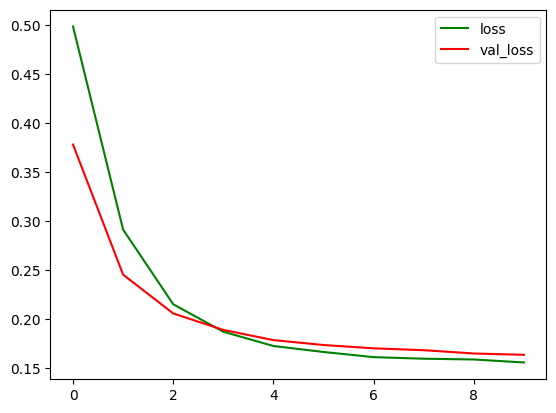

In [64]:
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='r')
plt.legend(['loss','val_loss'])
plt.show()

###### validation loss should be underneath


#### Evaluate the Model

To evaluate the model use the evaluate method and pass the input and output to the model and check the performance.

In [54]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Model accuracy: %.2f"% (accuracy*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9405 - loss: 0.1945
Model accuracy: 93.93


#### Make Predictions

In [55]:
y_prediction = model.predict(X_test)
print([round(x[0]) for x in y_prediction])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
#classification report
print(classification_report(Y_test, np.round(abs(y_prediction))))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [57]:
#check accurracy
accuracy_score(Y_test, np.round(abs(y_prediction)))*100

93.9334637964775

#### Confusion Matrix

In this step, you will use a confusion matrix to check the number of correct and incorrect predictions. A confusion matrix, also known as an error matrix, is a square matrix that reports the number of true positives(tp), false positives(fp), true negatives(tn), and false negatives(fn) of a classifier.

In [58]:
_matrix = confusion_matrix(Y_test, np.round(abs(y_prediction)))
_matrix

array([[960,   0],
       [ 62,   0]], dtype=int64)

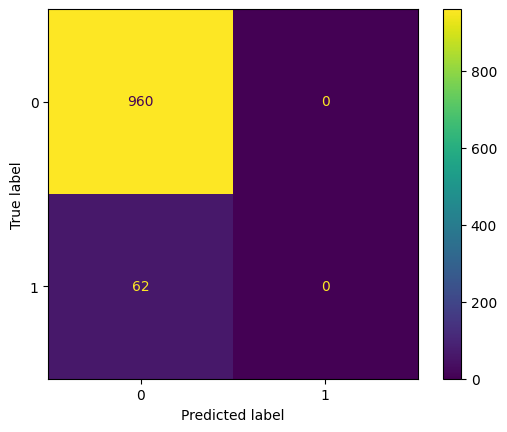

In [59]:
#Confusion matrix heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=_matrix, display_labels=[0,1])
disp.plot()
plt.show()

The output shows that the model is training efficiently (1ms/step), achieving a high accuracy on the training data (94.05%), and minimizing the loss (0.1945). The final model accuracy of 93.93% indicates a reasonably good performance. 

Key Metrics
Precision: The proportion of positive identifications that were actually correct.
Recall: The proportion of actual positives that were identified correctly.   
F1-score: The harmonic mean of precision and recall, providing a balance between the two.
Support: The number of instances for each class in the dataset.

Interpretation of Results
Class 0:
High precision (0.94) and recall (1.00) indicate that the model is very good at identifying instances of class 0.
The F1-score of 0.97 con

The model exhibits strong performance for class 0 but struggles with class 1. The imbalance in the dataset is evident, as reflected in the support values. The macro average F1-score highlights the model's limitations, while the weighted average F1-score is skewed towards the majority class.

The model has a high number of True Positives (960), which means it correctly predicted the positive class most of the time.
However, the model has a significant number of False Negatives (62), indicating it missed predicting 62 positive cases as positive.
The absence of False Positives suggests that the model never incorrectly predicted a negative case as positive.
Limitations and Next Steps:

In [65]:
#model.save('stroke.h5')
model.save('stroke.keras')

#### Loading a previously saved model

In [66]:
#load_model = tf.keras.load_model('diabetes.h5')
from tensorflow.keras.models import load_model

load_model = load_model('stroke.keras')

In [67]:
y_predict = load_model.predict(X_test)
print([round(x[0]) for x in y_predict])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
#classification report
print(classification_report(Y_test, np.round(abs(y_predict))))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\CK773QB\Documents\Python Scripts\Machine Learning\Nate45ML\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

